##### <center>**CMPINF 0010 - Group 36 Final Project**</center>
## <center>**What is the Least Depressing Neighborhood in Pittsburgh?**</center>

##### **The Project**
The aim of this project is to quantitatively determine the Pittsburgh neighborhood that is the least depressing to live in. To achieve this, we will be providing a clearly defined metric that we believe may indicate this quality in a neighborhood. The metric will be quantitative in nature and will be sourced from the **Western Pennsylvania Regional Data Center (WPRDC)**.
Our approach is to pick three submetrics from the **WPRDC**, each of which we believe to have significance in our definition of *least depressing*, given below. We will analyze the submetrics individually, as well as considered together, to arrive at a verdict for overall least-depressiveness.

##### **The Metric**
We quantitatively define the "least depressing neighborhood" as the neighborhood that:
<br>
* `contains or has easy access to the largest number of city parks;`
<br>
* `has the lowest lifetime number of police arrests;`
<br>
* and `has the highest rates of community center attendance.`

##### **Coming Up with the Metric**
Our process of arriving at our decided metric was sophisticated. We threw around a handful of spontaneous ideas--most of which were not put to paper and thus unable to be recalled--until we found one we both seemed to be okay with--the "least depressing" metric for determining the best neighborhood.
<br>
Afterwards, we combed through the WPRDC website for available datasets that were also well-structured and thus not a hassle to analyze.
<br>
Out of the approximately nine suitable datasets, namely
* no. of trees
* no. of signalized intersections
* no. of city parks
* community center attendance
* no. of smart trash containers
* no. of playground
* no. of bridges (this one might cut across neighborhoods)
* no. of retaining walls
* no. of water features (fountains, etc.),

we settled on the current three that became our three submetrics that we will be analyzing individually and in tandem to fulfill our main metric.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### **City Parks**

Parks! This is the first sub-metric. Who doesn't love parks? You can go inside them, look around them, frolick in them, walk your pet or yourself in them, and more. Parks typically are expected to contain plenty of greenery and open, relaxing spaces that fit outdoor recreation like a glove. Human brains are still very much primitive; spending time surrounded by natural greenery is good for us whether we think we like it or not. Therefore, it is an undeniable fact of our ape brains that more parks means more greenery which means more happiness. From this we can dervie with simple inverse correlation that more parks equates to a less depressing place to live. Let us see which neighborhoods are the most equipped with these parks.

I love reading. Let's read the file.

In [5]:
parks = pd.read_csv("city-parks/city-parks.csv")
parks.head(3)

,_id,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017


See now, I love reading, but not the things I don't need. Let us filter out the columns that we won't be needing.

In [6]:
parks[["name", "type", "neighborhood"]].head(5)

,name,type,neighborhood
0,Able Long Park,Park,Beechview
1,Albert Turk Graham Park,Park,Crawford-Roberts
2,Alcoa Park,Park,North Shore
3,Allegheny Commons,Park,Allegheny Center
4,Allegheny Landing Park,Park,North Shore


Much better.

First, let us sort by `neighborhood` so we can easily count how many there are in each. Since parks are places, and a place can't be in two places at the same time, we only need to count the number of unique park names for each `neighborhood` to determine the amount in each. We can ignore the parks' `type` for the moment.

In [9]:
parks[["name", "neighborhood"]].groupby("neighborhood").count()

,name
neighborhood,
Allegheny Center,2
Allentown,2
Arlington,1
Banksville,2
Bedford Dwellings,1
...,...
Upper Lawrenceville,3
West End,2
West Oakland,1


Now, we want to sort this so the winner gets to go on top. The simplest way to do this is to use the `sort_values()` function. Watch out! Don't forget to specify the argument to sort by descending!

In [12]:
parksDF = parks[["name", "neighborhood"]].groupby("neighborhood").count().sort_values(by="name", ascending=False).head(15)
parksDF

,name
neighborhood,
East Liberty,12
Central Business District,10
Beechview,8
South Side Slopes,7
Point Breeze,7
South Side Flats,6
Hazelwood,6
Sheraden,6
Squirrel Hill South,6


Now that is really nice, but since the type of park was easily made available for us, it is best we make some use of it. Five types are present, namely `Park`, `Traffic Island/Median`, `Monument/Memorial`, `Open Space`, and `Building Grounds`. Based on the typical size expected of each of these types--all of which are only estimates based on the *feel* I get from Google images--we apply a multiplier to adjust for their (expected) size differences relative to the largest type (`Park`) as well as the expected amount of greenery and nature.

In [13]:
weights = {"Park":1.0,
               "Traffic Island/Median":0.1,
              "Monument/Memorial":0.4,
              "Open Space":0.1,
              "Building Grounds":0.2}

Now, we iterate through each park to note its type and indicate the amount of each present for each neighborhood.

In [14]:
parksDF = parks[["name", "neighborhood"]].groupby("neighborhood").count().sort_values(by="name", ascending=False)

typeSeries = parks[["type", "neighborhood"]].loc[:, "type"]
neighborhoodSeries = parks[["type", "neighborhood"]].loc[:, "neighborhood"]

types = ["Park", "Traffic Island/Median", "Monument/Memorial", "Open Space", "Building Grounds"]

for i in range(len(typeSeries)):
    
    #create column if it doesn't exist
    if typeSeries[i] not in parksDF.columns:
        parksDF[typeSeries[i]] = 0
    
    parksDF.loc[neighborhoodSeries[i], typeSeries[i]] += 1
parksDF

,name,Park,Traffic Island/Median,Building Grounds,Monument/Memorial,Open Space
neighborhood,,,,,,
East Liberty,12,4,8,0,0,0
Central Business District,10,3,5,0,0,2
Beechview,8,6,1,0,1,0
South Side Slopes,7,6,0,1,0,0
Point Breeze,7,1,6,0,0,0
...,...,...,...,...,...,...
Bon Air,1,1,0,0,0,0
Central Lawrenceville,1,1,0,0,0,0
Squirrel Hill North,1,1,0,0,0,0


Now we just apply the weights and sum them again.

In [15]:
parksDF["score"] = (parksDF["Park"]*weights["Park"] +
                    parksDF["Traffic Island/Median"]*weights["Traffic Island/Median"] +
                    parksDF["Building Grounds"]*weights["Building Grounds"] +
                    parksDF["Monument/Memorial"]*weights["Monument/Memorial"] +
                    parksDF["Open Space"]*weights["Open Space"])

parksDF = parksDF.sort_values(by="score", ascending=False)
parksDF

,name,Park,Traffic Island/Median,Building Grounds,Monument/Memorial,Open Space,score
neighborhood,,,,,,,
Beechview,8,6,1,0,1,0,6.5
South Side Slopes,7,6,0,1,0,0,6.2
Mount Washington,6,5,0,1,0,0,5.2
Hazelwood,6,5,0,1,0,0,5.2
Troy Hill,5,5,0,0,0,0,5.0
...,...,...,...,...,...,...,...
Esplen,1,1,0,0,0,0,1.0
Windgap,1,1,0,0,0,0,1.0
Fairywood,1,1,0,0,0,0,1.0


<Axes: xlabel='neighborhood'>

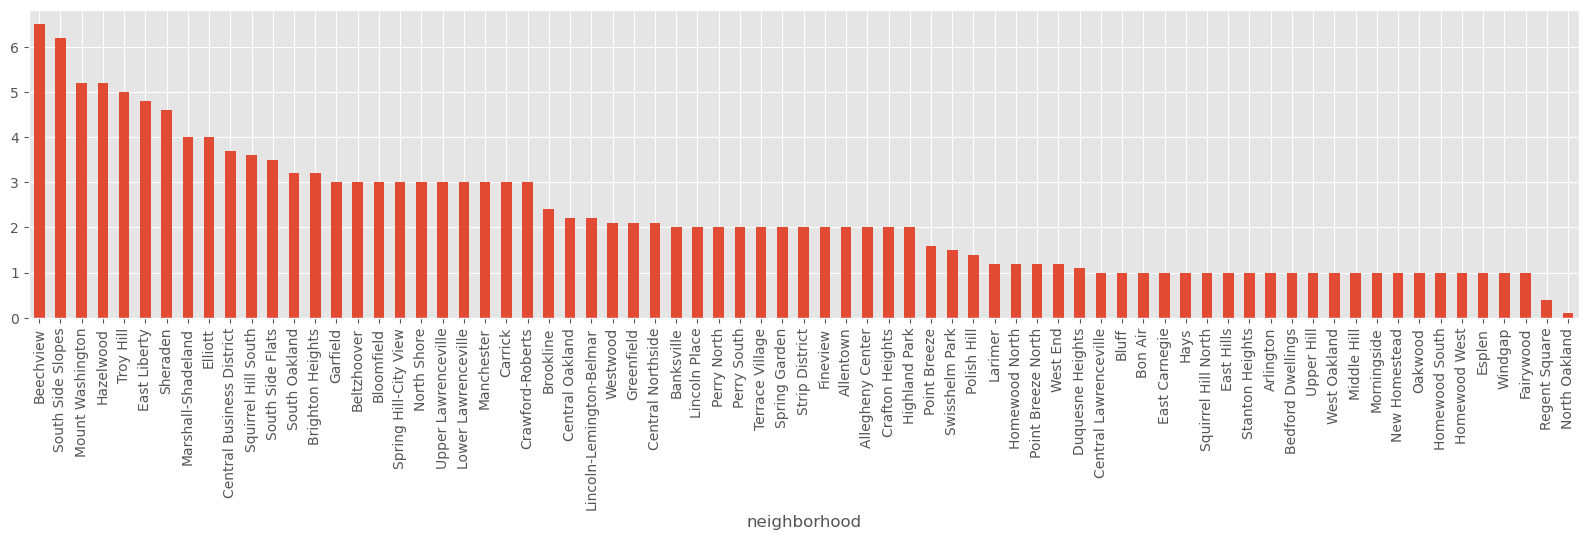

In [16]:
plt.style.use("ggplot")
parksDF["score"].plot.bar(figsize=(20,4))

In terms of having the most city parks, Beechview is clearly the winner. Now, I am no Pittsburgh local. In fact, it's only been three months since I landed in this silly country. Therefore, I don't even remember hearing the name `Beechview` until when I was doing this project. "Sorry, what was that? Beach view? Does Pittsburgh have beaches?" would've been my reaction. Clearly, I know nothing about this particular neighborhood, so I have no qualifying opinion on how good it actually is. Looking at online images though, I don't think it's half bad. Seems like an okay place to live, and looking at a map I do see how it might have the largest amount of city parks, even if their sizes all dwarf in comparison to good old Schenley or Frick. I will say I am slightly surprised, since I was not expecting a neighborhood with the land area of Beechview to have the largest amount of parks. I suppose I underestimated how small parks can get and still be listed on the **WPRDC.**
<br>
South Side Slopes is the runner-up here and might also have a good chance of winning. I seen this neighborhood exactly once from the roads of South Side Flats, so based on that alone I'd say it does look plenty green, though I'm not sure how much of the greenery are located in the parks.

#### **Service Requests**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

In this notebook we are going to examine the frequency of 311 requests per neighborhood in Pittsburgh so that we can later use them in our broader study of least-depressing neighborhoods in Pittsburgh. We're going accomplish this by using Pandas to aggregate the number of requests per neighborhood, and then we're going to divide the number of requests by the number of people in the neighborhood. Then, we're going to normalize the ratio into a zero-to-one scale. Finally we're going to generate a plot to see which neighborhood requires the least service per person.

In [19]:
raw_reqs = pd.read_csv('service-requests/service-requests.csv')
reqs = raw_reqs["neighborhood"].value_counts()
print(reqs)

neighborhood
Brookline                    31289
Carrick                      30172
South Side Flats             28918
South Side Slopes            28601
Squirrel Hill South          28317
Bloomfield                   22380
Central Business District    21298
Mount Washington             20983
Beechview                    18592
Shadyside                    17377
Greenfield                   16697
Hazelwood                    14686
Central Lawrenceville        14366
Brighton Heights             14363
East Liberty                 13808
Squirrel Hill North          13571
Marshall-Shadeland           13335
Sheraden                     13289
Garfield                     12321
Highland Park                12098
Lincoln-Lemington-Belmar     12018
Stanton Heights              11525
Perry North                  11437
Crafton Heights              11401
Central Oakland              11317
Perry South                  11262
Knoxville                    11199
Overbrook                    10653
South O

So, above we see that Mount Oliver Borough has the fewest service calls outright. That looks pretty promising! But perhaps it is just a very small or sparsely populated area. Lets go grab our population data and see what things look like after we correct for neighborhood size.

Note that I will be slightly modifying the population dataset to better fit the neighborhood names in *this* data set, because apparently nobody can spell things consistently. Like, I literally saw mountain spelled "Mountain" and "Mt." and they were right next to eachother. Reader, I am screaming.

In [20]:
pops = pd.read_csv('neighborhood-populations.csv', index_col="Neighborhood")
pops.keys()
for name, count in reqs.items():
    if name in pops.index:
        reqs[name] /= pops.loc[name, "2020_Total_Population"]

reqs = reqs.sort_values()
print(reqs)

neighborhood
Arlington Heights             0.078922
Mount Oliver Borough          0.218962
Northview Heights             0.465235
Glen Hazel                    0.710167
North Oakland                 0.712468
Bluff                         0.839340
Terrace Village               0.954741
Fairywood                     1.044872
Shadyside                     1.134491
Squirrel Hill North           1.142436
Banksville                    1.307972
Westwood                      1.317227
Bedford Dwellings             1.347763
Friendship                    1.493632
Oakwood                       1.505366
Swisshelm Park                1.690814
West Oakland                  1.709155
East Carnegie                 1.824847
Squirrel Hill South           1.848730
Point Breeze                  1.877337
Central Oakland               1.939503
Highland Park                 1.940337
Crawford-Roberts              2.000000
Brighton Heights              2.021534
Windgap                       2.116815
New Homestea

/var/folders/1n/80z263352xs1mwr7c9hv18b40000gn/T/ipykernel_3973/2643931989.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.3952384597718748' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  reqs[name] /= pops.loc[name, "2020_Total_Population"]


So, here we can clearly see that in actuality, Arlington Heights beats out the Mount Oliver Borough by a tad. Now, I'd normalize these values, but because we have outliers, it really doesn't make much sense to do so, so instead we will just handle them as-is.

<Axes: xlabel='neighborhood'>

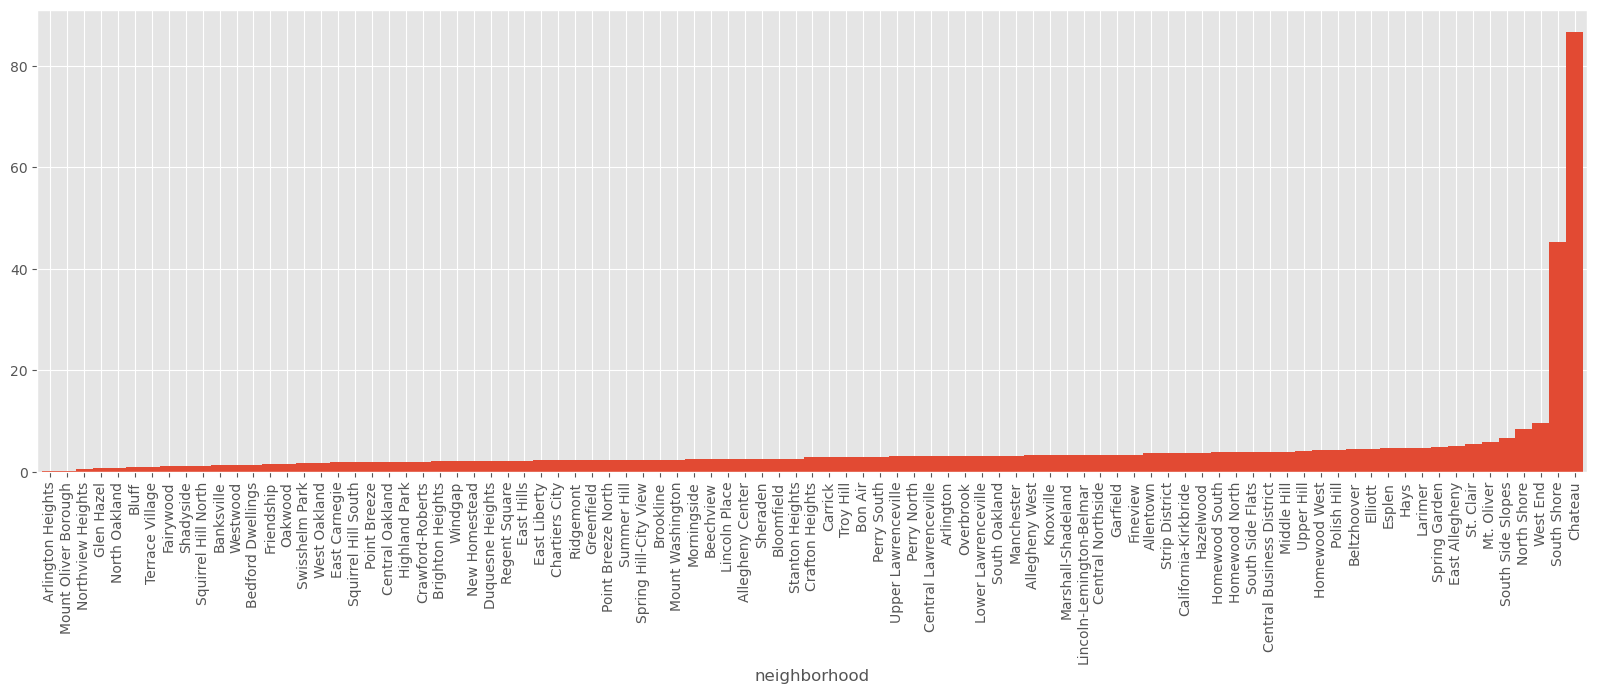

In [21]:
plt.style.use("ggplot")
reqs.plot(kind="bar", width=1, figsize=(20, 6))

#### **Police Arrests**

Now that sounds like no fun. Not only is it no fun being arrested, it is also no fun if arrests happen frequently around you, which would usually indicate a high crime rate or at least less safety compared to a nieghborhood with fewer arrests. Those then likely mean the neighborhood isn't the most well put-together (there are usually complex systematic reasons for this but here is not the place to open that can of worms). All of these significantly increase the likelihood that said beighborhood is one that would be depressing to live in. Thus, we conclude that the number of arrests in a given neighborhood positively correlates with how depressing it is; `more arrests = more depressing`. The data we are using covers only the last eight years (from 2016 onwards), so we needn't worry about outdated or irrelevant data due to age.

Let us read the file.

In [22]:
arrests = pd.read_csv("arrests/arrests.csv")
arrests.head(5)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


That is a lot of depressing data. Let us filter out what we don't need.

In [27]:
    arrests[["OFFENSES", "ARRESTTIME", "INCIDENTNEIGHBORHOOD"]].head(5)

,OFFENSES,ARRESTTIME,INCIDENTNEIGHBORHOOD
0,3929 Retail Theft.,2016-08-24T12:20:00,Bloomfield
1,13(a)(16) Possession of Controlled Substance,2016-08-03T14:55:00,Outside City
2,3929 Retail Theft.,2016-08-03T16:45:00,Westwood
3,5503 Disorderly Conduct. / 5505 Public Drunken...,2016-08-05T02:36:00,East Allegheny
4,2702 Aggravated Assault. / 2705 Recklessy Enda...,2016-08-06T02:00:00,Crafton Heights


Now, we sort by `neighborhood` to count the number of arrets that occured in each. One easy way is to just count unique `ARRESTTIME` timestamps, since they appear to be accurate down to the minute, and it is extremely unlikely that two instances of arrest in the same neighborhood occur at exactly the same minute within the scope of this dataset.

In [28]:
arrests[["ARRESTTIME", "INCIDENTNEIGHBORHOOD"]].groupby("INCIDENTNEIGHBORHOOD").count()

,ARRESTTIME
INCIDENTNEIGHBORHOOD,
Allegheny Center,1244
Allegheny West,130
Allentown,947
Arlington,312
Arlington Heights,155
Banksville,291
Bedford Dwellings,665
Beechview,1201
Beltzhoover,496


In [31]:
arrestsSeries = arrests[["ARRESTTIME", "INCIDENTNEIGHBORHOOD"]].groupby("INCIDENTNEIGHBORHOOD").count().loc[:, "ARRESTTIME"].sort_values(ascending=True)
arrestsSeries

INCIDENTNEIGHBORHOOD
Mt. Oliver Neighborhood           2
Troy Hill-Herrs Island            6
Mt. Oliver Boro                  18
Central Northside                23
Ridgemont                        37
Regent Square                    37
New Homestead                    39
Swisshelm Park                   43
Chartiers City                   46
East Carnegie                    48
St. Clair                        55
Outside County                   57
Outside State                    67
Summer Hill                      76
Oakwood                          82
Golden Triangle/Civic Arena      83
Hays                            120
Mount Oliver                    124
Windgap                         124
Fairywood                       127
Allegheny West                  130
Arlington Heights               155
Polish Hill                     166
Glen Hazel                      169
Friendship                      174
Morningside                     188
Upper Lawrenceville             189
Duquesn

<Axes: xlabel='INCIDENTNEIGHBORHOOD'>

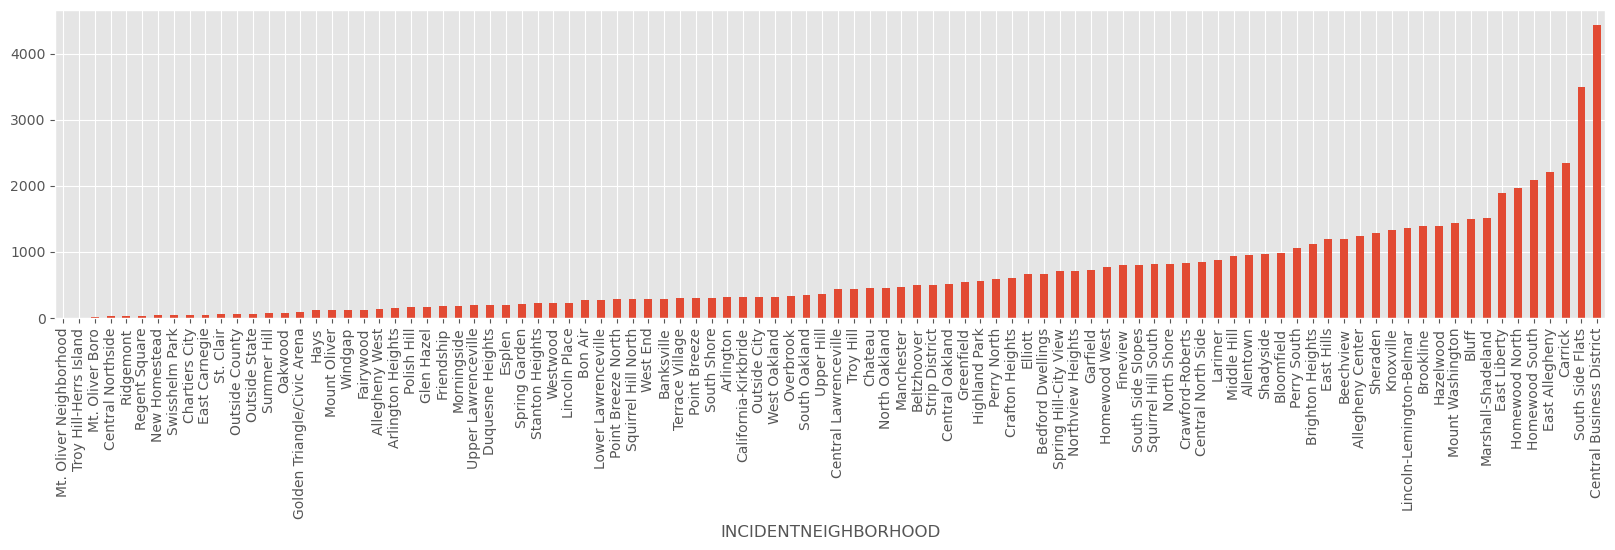

In [32]:
plt.style.use("ggplot")
arrestsSeries.plot.bar(figsize=(20,4))

Now we can clearly see that Downtown appears to be the most depressing neighborhood to live in by this metric. Not surprising, considering that downtowns are typically the most active parts of a city and that more crime typically is an inevitable part of that.
<br>
Plenty of neighborhoods seem to have very little arrests within the last eight years, and the one with the absolute least is none other than `Mt. Oliver`! Yeah, no, I have no idea where that is too. A quick glance at Google images tells me that it is your average Pittsburgh residential, mildly suburban chill neighborhood. I've got nothing else to go off of, so this is all I am really able to say. Congrats, Mt. Oliver, I guess.

#### **Data Conclusion**

Our approach for combining our metrics is fairly simple. In order to make our make our metrics "make sense" relative to eachother, we will be weighting them based on how much of an effect we believe the given metric will have when it comes to making a neighborhood "depressing." Then, we'll simply take the sum of all three weighted scores, and the highest score should crown our winner.

For our weights, we'll be using:<br>
`-1.5x` for Arrests,<br>
`-0.5x` for Service Requests,<br>
and `1x` for Park Count<br>

In this case, we are using negative weights to denote a negative attribute. Service requests are arguable here, because having a part of a neighborhood serviced implies that the neighborhood's features are being well-maintained, but we figure that having to see that work taking place isn't the greatest. All else should be relatively self-explanatory, but very subjective.

In [33]:
import math

final_scores = pd.DataFrame(columns=['Neighborhood', 'Final Score'])
for neighborhood in arrests["INCIDENTNEIGHBORHOOD"].unique():
    is_error = False
    try:
        if math.isnan(neighborhood):
            continue
    except:
        is_error = False
    
    park_score = 0
    try:
        park_score = parksDF.loc[neighborhood, "score"]
    except:
        park_score = 0
    
    score = -1.5 * arrestsSeries.get(neighborhood, 0) + -0.5 * reqs.get(neighborhood, 0) + park_score
    final_scores = pd.concat([final_scores, pd.DataFrame({'Neighborhood': [neighborhood], 'Final Score': [score]})])

final_scores = final_scores.sort_values('Final Score', ascending=False)
final_scores = final_scores.set_index('Neighborhood')

print(final_scores)

                             Final Score
Neighborhood                            
Mt. Oliver Neighborhood        -3.000000
Troy Hill-Herrs Island         -9.000000
Mt. Oliver Boro               -27.000000
Central Northside             -34.081864
Regent Square                 -56.201957
Ridgemont                     -56.646154
New Homestead                 -58.562159
Swisshelm Park                -63.845407
Chartiers City                -70.123984
East Carnegie                 -71.912424
St. Clair                     -85.270492
Outside County                -85.500000
Outside State                -100.500000
Summer Hill                  -115.178858
Oakwood                      -122.752683
Golden Triangle/Civic Arena  -124.500000
Hays                         -181.295950
Mount Oliver                 -186.000000
Windgap                      -186.058408
Fairywood                    -190.022436
Allegheny West               -196.599074
Arlington Heights            -232.539461
Polish Hill     

/var/folders/1n/80z263352xs1mwr7c9hv18b40000gn/T/ipykernel_3973/3272174168.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_scores = pd.concat([final_scores, pd.DataFrame({'Neighborhood': [neighborhood], 'Final Score': [score]})])


<Axes: xlabel='Neighborhood'>

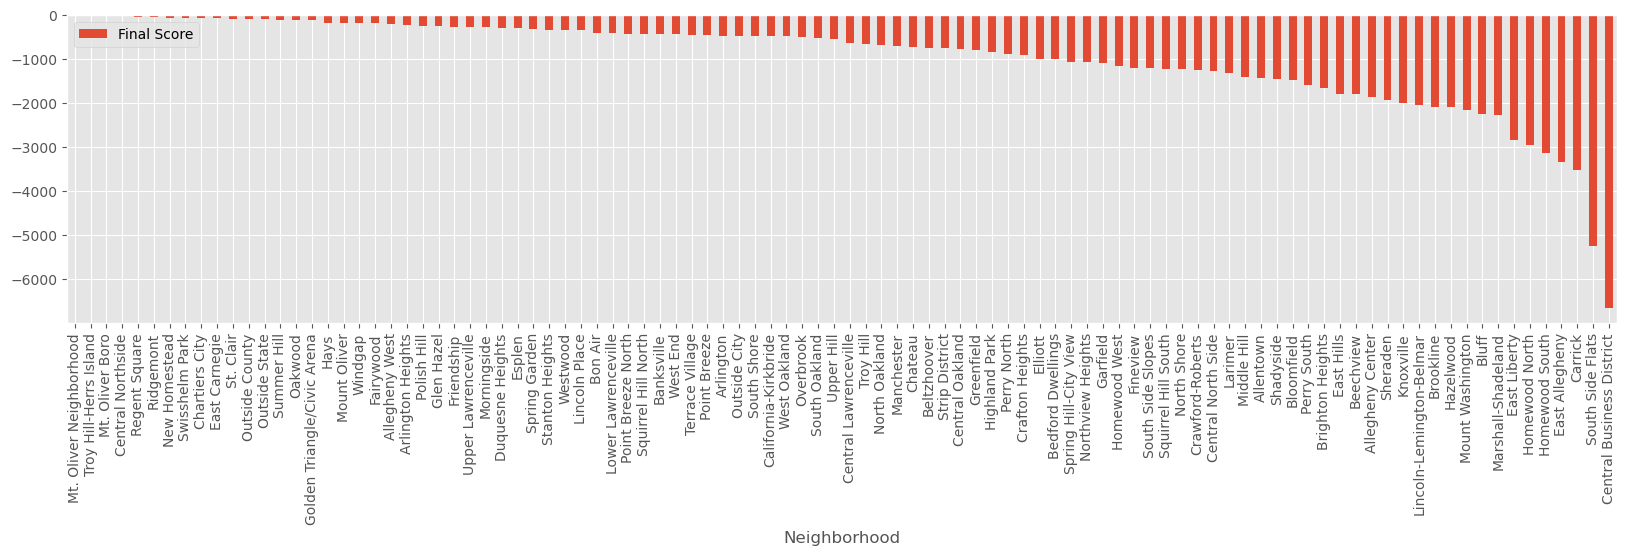

In [34]:
plt.style.use("ggplot")
final_scores.plot.bar(figsize=(20,4))

In conclusion, we can see that, by our metrics, Mt. Oliver seems to be the least depressing neighborhood in Pittsburgh. Of course, this comes with a great many caveats; in many places, we should have controlled for the size of the neighborhood to account for the spacing of depressing/anti-depressing factors, but unfortunately that data is not readily available. We also did not control for outliers, so the skew in our data is pretty bad! Still, judging by a quick search for pictures of the neighborhood, it seems like a nice place to be.

#### **Personal Thoughts and Reflections**

##### **Korosh**


As previously stated, going into this project I had honestly no idea what to expect as I am new to the country and have only really been to a select few neighborhoods such as Downtown, Squirrel Hill, East Liberty, and of course Oakland. However, having been a city-dweller for most of my life up to this point, my personal choice for least depressing neighborhood would without much hestitation be Downtown for the simple reasons of convenience, walkability, accessibility, and the overall feeling of being thorouhgly connected to civilization. I wouldn't mind Oakland too much either, as for the most part it too satisfies the personal criteria I just listed. I do have to acknowledge that the sub-metrics we came up with for this project does bring to mind considerations that cannot be ignored. For me, the most notable of them was the number of police arrests which--having come from a relatively low crime rate city and neighorhood--was not something I had really considered before doing this project. I would say though that in my opinion, for the city of Pittsburgh specifically, this metric would not concern me as much as it does for other major cities mostly due to Pittsburgh being one of the safer urban centers in the country. As for the winner for least depressing neighborhood based on our established metrics, the neighborhood of Mt. Oliver looks like it might fit some of my personal criteria, at least from images online. It looks walkable enough, but if given the choice I'd still put more weight on accessibility and being centrally located.

##### **Daniel**

Like my partner, I am relatively new to city living in general, let alone Pittsburgh. Having lived in a suburban-rural area for most of my life, I've found it somewhat hard to adjust to the densely packed blocks of buildings and relative lack of greenery and noise. Unfortunately, there wasn't really a good way to factor that in to our calculations, so I leaned on things like 311 requests and arrests to act as proxies -- after all, it stands to reason that less dense places will have fewer entries on both of these metrics. Of course, a less dense area comes with a number of downsides, like the inconvenience of travel and whatnot, but generally speaking I am willing to make that trade. Subsequently, seeing Mt. Oliver come out on top aligns somewhat closely with my ideal living conditions. While it is somewhat lacking in greenery, the absence of looming buildings and concrete sprawl, along with the presumably reduced city noise, are signs that perhaps our data gathering wasn't too far off the mark.